# The Sparks Foundation Network
## #GRIP sep21

## Task 1 : Data Science And Business Analytics

## Title : Prediction Using Supervised Learning

### By Nikhil Pokharkar


#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a Simple Linear Regression task as it involves just two variables.

In [2]:
# importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

##### importing the data

In [16]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

so it seems that there are no null values in the data

##### now plotting the distribution of scores


In [4]:
df.shape

(25, 2)

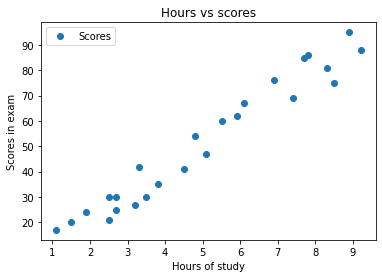

In [5]:
df.plot(x = 'Hours', y = 'Scores', style='o')
plt.xlabel('Hours of study')
plt.ylabel('Scores in exam')
plt.title('Hours vs scores')
plt.show()

##### From the graph above, we can clearly seen that there is positive linear relation between the hours of studies and percentage of scores 



### Identifying the outliers in the data

<AxesSubplot:>

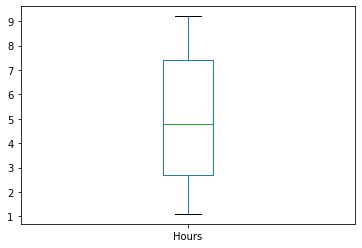

In [10]:
df['Hours'].plot.box()

<AxesSubplot:>

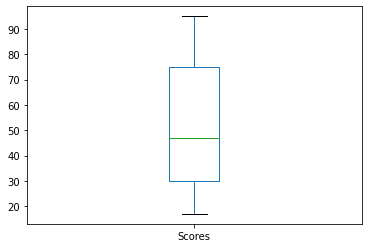

In [11]:
df['Scores'].plot.box()

it seems that there is no outliers in the data





### preparing the Data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [19]:
x = df.iloc[: , :-1].values
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method



In [20]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### Training the alogorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [21]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.coef_

array([9.91065648])

In [23]:
reg.intercept_

2.018160041434683

### Now plotting the regression line

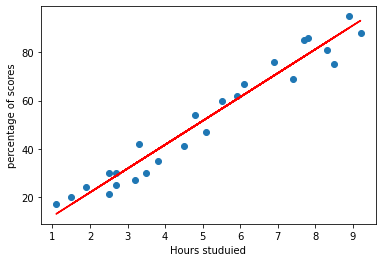

In [24]:
line = reg.coef_ * x + reg.intercept_

plt.scatter(x, y)
plt.plot(x, line, color= 'red')
plt.xlabel('Hours studuied')
plt.ylabel('percentage of scores')
plt.show()

### Making Prediction

In [25]:
y_predicted = reg.predict(x_test)

### comparing Actual vs Predicted

In [26]:
d = pd.DataFrame({'Actual':y_test,
                 'Predicted':y_predicted})
d

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
hours = 9.25
own_pred = reg.predict([[hours]])

print('The predicted score if person studied for',  hours, 'hours is', own_pred)

The predicted score if person studied for 9.25 hours is [93.69173249]


In [28]:
from sklearn import metrics
print('mean absolute error:', metrics.mean_absolute_error(y_test,y_predicted))

mean absolute error: 4.183859899002975


## Thank you